### Data Preview

Using Machine Learning to predict the sales of game

Libraries Used:
- Pandas
- Matplotlib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../style_Matplotlib_charts.mplstyle')

Data Set Import

In [3]:
data_frame = pd.read_csv("vgsales.csv")

Data Set Head (Sales are measured in million copies)

In [4]:
data_frame.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Data Set Info

In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### Numerical Column Stats

In [6]:
data_frame.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Plot Data in Graph

<Axes: >

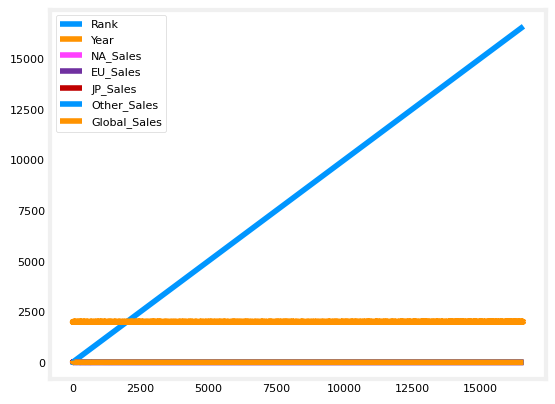

In [7]:
data_frame.plot()

Graph without Rank and Years for Clarity

<Axes: >

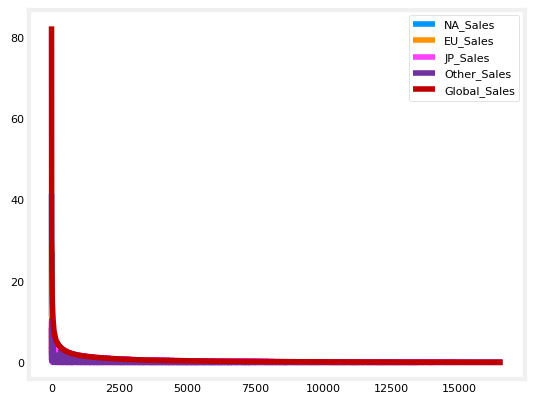

In [8]:
data_frame_nonRank = data_frame.drop(labels="Rank",axis=1).drop(labels="Year",axis=1)
data_frame_nonRank.head()
data_frame_nonRank.plot()

Histogram For Global_Sales

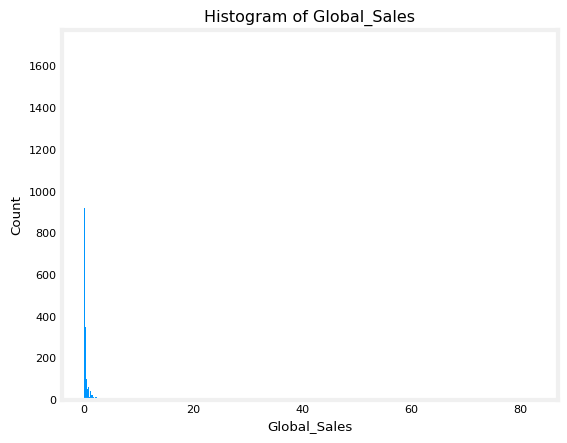

In [19]:
plt.hist(data_frame['Global_Sales'],bins=5000)
plt.title(f"Histogram of {data_frame['Global_Sales'].name}")
plt.ylabel('Count')
plt.xlabel(f'{data_frame["Global_Sales"].name}')
plt.show()

Histogram For Global_Sales excluding top 150 (for lower-value clarity)

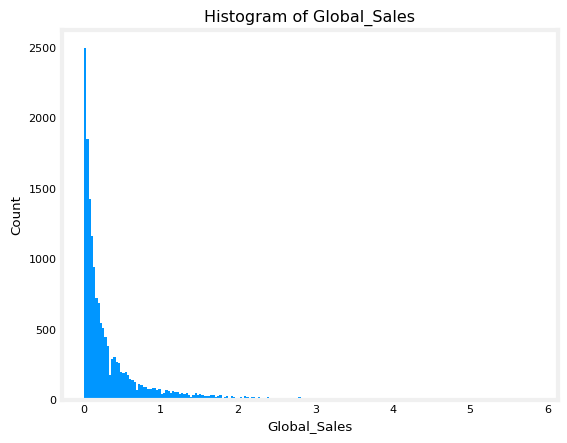

In [11]:
n=0
data_frame_nonTop150 = data_frame
while n < 149:
    data_frame_nonTop150 = data_frame_nonTop150.drop(labels= n)
    n += 1
data_frame_nonTop150.head()
plt.hist(data_frame_nonTop150['Global_Sales'],bins=200)
plt.title(f"Histogram of {data_frame_nonTop150['Global_Sales'].name}")
plt.ylabel('Count')
plt.xlabel(f'{data_frame_nonTop150["Global_Sales"].name}')
plt.show()

Histogram For Global_Sales excluding Global_Sales greater than 2.5 (million copies) (for lower-value clarity)


This excludes 616 values from the dataset out of 16600

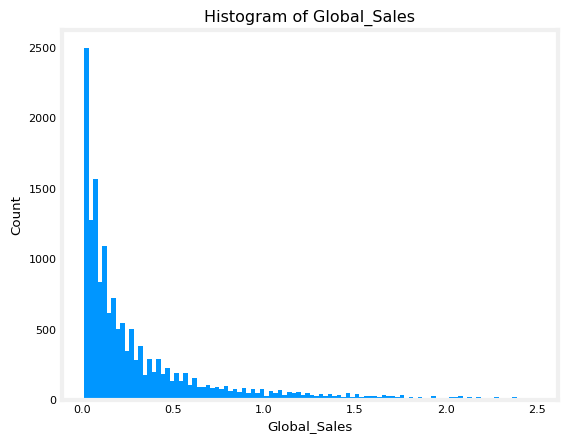

In [16]:
n=0
data_frame_nonTopN = data_frame
while n < 616:
    data_frame_nonTopN = data_frame_nonTopN.drop(labels= n)
    n += 1
data_frame_nonTopN.head()
plt.hist(data_frame_nonTopN['Global_Sales'],bins=100)
plt.title(f"Histogram of {data_frame_nonTopN['Global_Sales'].name}")
plt.ylabel('Count')
plt.xlabel(f'{data_frame_nonTopN["Global_Sales"].name}')
plt.show()

Histogram for Release Year Data

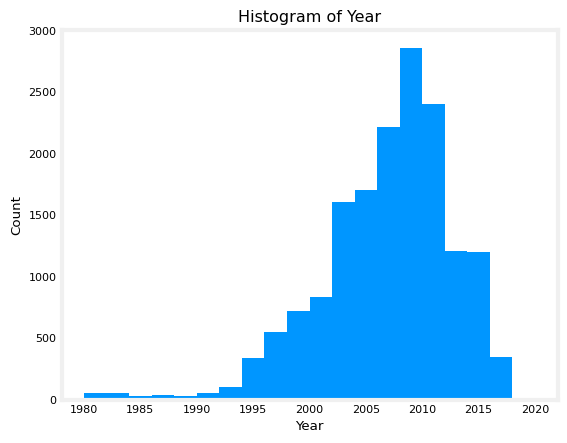

In [24]:
plt.hist(data_frame['Year'],bins=20)
plt.title(f"Histogram of {data_frame['Year'].name}")
plt.ylabel('Count')
plt.xlabel(f'{data_frame["Year"].name}')
plt.show()

Due to Rank being inversely related to Global Sales, I will compare year of release to Global_Sales. ML problem will be predicting game copy sales related to the year the game is sold and later company once I feature engineer it.

Scatterplot of Global_Sales to Rank Data

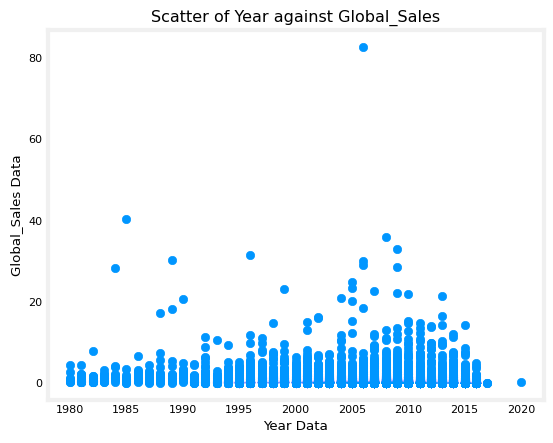

In [26]:
plt.scatter(data_frame['Year'], data_frame['Global_Sales'])
plt.title(f"Scatter of {data_frame['Year'].name} against {data_frame['Global_Sales'].name}")
plt.ylabel(f'{data_frame['Global_Sales'].name} Data')
plt.xlabel(f'{data_frame['Year'].name} Data')
plt.show()

Scatterplot For Year to Global_Sales excluding 1st

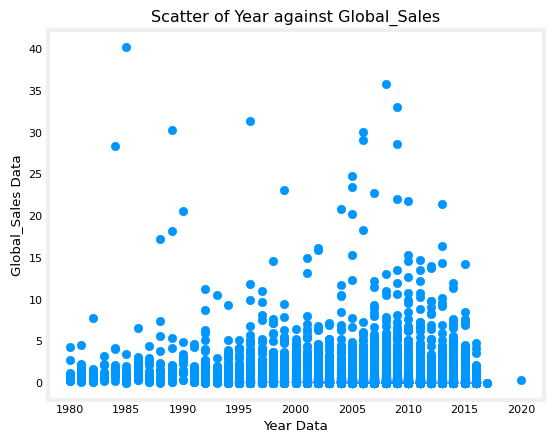

In [30]:
data_frame1 = data_frame.drop(labels=0)
plt.scatter(data_frame1['Year'], data_frame1['Global_Sales'])
plt.title(f"Scatter of {data_frame1['Year'].name} against {data_frame1['Global_Sales'].name}")
plt.ylabel(f'{data_frame1['Global_Sales'].name} Data')
plt.xlabel(f'{data_frame1['Year'].name} Data')
plt.show()

Scatterplot JP_Sales and Release Year Data to Global_Sales Data 

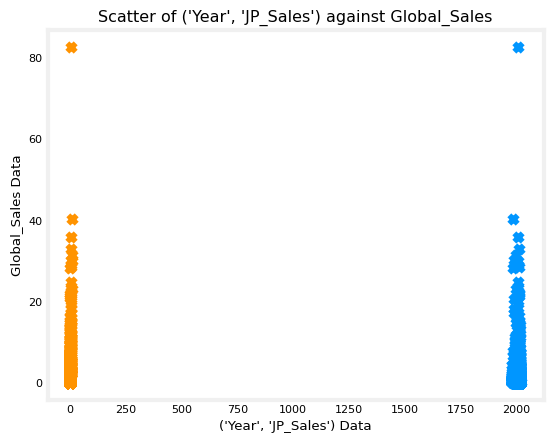

In [34]:
x_plot = ['Year', 'JP_Sales']
for col in x_plot:
    plt.scatter(data_frame[col], data_frame['Global_Sales'], marker='x')
plt.title(f"Scatter of {*x_plot,} against {data_frame['Global_Sales'].name}")
plt.ylabel(f'{data_frame['Global_Sales'].name} Data')
plt.xlabel(f'{*x_plot,} Data')
plt.show()

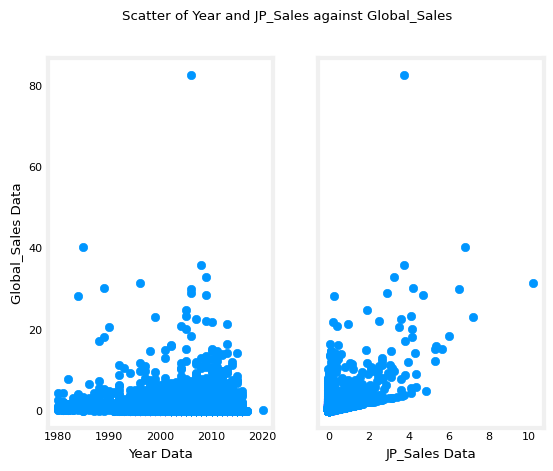

In [36]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
plt.suptitle(f"Scatter of {data_frame['Year'].name} and {data_frame['JP_Sales'].name} against {data_frame['Global_Sales'].name}")
ax1.set_ylabel(f'{data_frame['Global_Sales'].name} Data')

ax1.scatter(data_frame['Year'], data_frame['Global_Sales'])
ax1.set_xlabel(f'{data_frame['Year'].name} Data')

ax2.scatter(data_frame['JP_Sales'], data_frame['Global_Sales'])
ax2.set_xlabel(f'{data_frame['JP_Sales'].name} Data')

plt.show()

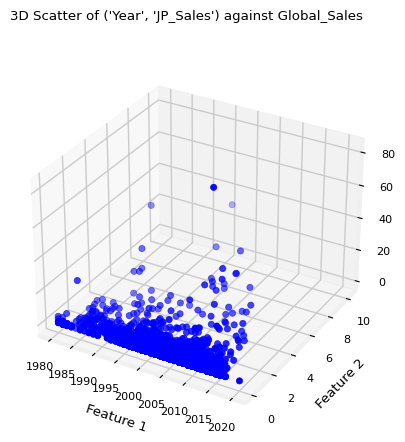

In [37]:
x_plot = ['Year', 'JP_Sales']

fig = plt.figure()
plt.suptitle(f"3D Scatter of {*x_plot,} against {data_frame['Global_Sales'].name}")
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_frame[x_plot[0]], data_frame[x_plot[1]], data_frame['Global_Sales'], color='blue')

x1_range = np.linspace(data_frame[x_plot[0]].min(), data_frame[x_plot[0]].max())
x2_range = np.linspace(data_frame[x_plot[1]].min(), data_frame[x_plot[1]].max())
X1_grid, X2_grid = np.meshgrid(x1_range, x2_range)


ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')

plt.show()